In [22]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.ticker as ticker
import seaborn as sns
plt.style.use('ggplot')
# pd.set_option("max_columns",200)


In [23]:
df = pd.read_csv("C:/Users/User/Downloads/Documents/Largest WWTP/clean_largewwtp.csv")

In [24]:
df['City_Country'] = df['City'] + ', ' + df['Country']
df2 = df.drop(columns=['City','Country','Plant_Name','Opening_Year','Latitude',\
                       'Longitude','Area(sqkm)'])
df_melted = df2.melt(id_vars='City_Country', var_name='Weather', value_name='Value')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Montreal, Canada'),
  Text(1, 0, 'Detroit, USA'),
  Text(2, 0, 'Chicago, USA'),
  Text(3, 0, 'Washington D.C., USA'),
  Text(4, 0, 'Boston, USA'),
  Text(5, 0, 'Giza, Egypt'),
  Text(6, 0, 'Mexico City, Mexico'),
  Text(7, 0, 'Los Angeles, USA'),
  Text(8, 0, 'Moscow, Russia'),
  Text(9, 0, 'Paris, France'),
  Text(10, 0, 'Shanghai, China'),
  Text(11, 0, 'Hong Kong, China'),
  Text(12, 0, 'Cairo, Egypt'),
  Text(13, 0, 'London, UK'),
  Text(14, 0, 'Tokyo, Japan'),
  Text(15, 0, 'Beijing, China'),
  Text(16, 0, 'Melbourne, Australia'),
  Text(17, 0, 'Dhaka, Bangladesh'),
  Text(18, 0, 'Charlotte, N.C., USA')])

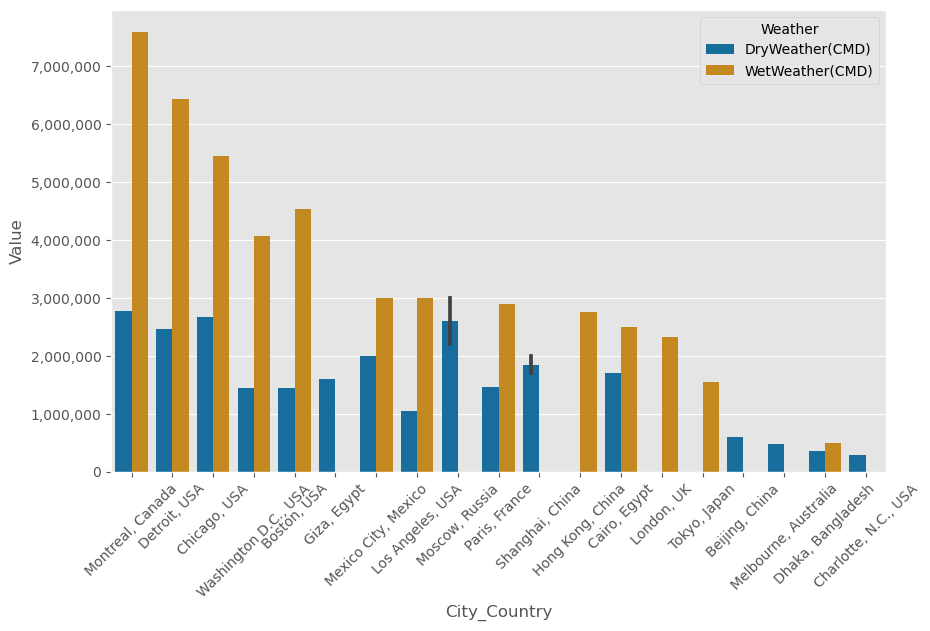

In [27]:
plt.figure(figsize=(10, 6))  
sns.barplot(x='City_Country', y='Value', hue='Weather', data=df_melted, palette='colorblind')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.xticks(rotation=45, ha='right')
